# DECTECTING WHOLE GENOME DUPLICATION USING HOGS
                    

# First Step Project, Robin Hofmeister, Autumn 2017

                        Directed by Prof. Christophe Dessimoz
                        Supervised by Clement Train

## Table of contents:

######    1. Initialisation
######     2. Function useful for analysis
######     3. Results
    

        3.1 Preview
            - distribution genomes size
            - distribution rate of duplication
            - distribution of ratios
            
            
        3.2 Extant genomes
            - Venn diagram
            - table of results
    
        3.3 Ancestral genomes
            - plot with the rate of duplication
            - table of results
    
        3.4 Vertebrates and fish-specific WGD
   


######     4. Supplemental tables
        4.1 Table with characteristics of referenced extant and ancestral genomes


# 1. Initialisation

* Import libraries
* Import file containing HOGs (orthoXML)
* Import file containing the related species tree (nwk)
* Creation gene and genomes objects with pyham library

In [1]:
import pyham
import logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(name)-12s %(levelname)-8s %(message)s")
%matplotlib notebook
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from matplotlib_venn import venn3
import pandas as pd
import matplotlib.patches as mpatches








nwk_path = "Eukaryota.nwk"
tree_str = pyham.utils.get_newick_string(nwk_path, type="nwk") 
orthoxml_path = "Vertebrates.2017Oct11.orthoxml"
ham_analysis = pyham.Ham(tree_str, orthoxml_path, use_internal_name=True)

2017-12-19 17:45:06,266 pyham.ham    INFO     Build taxonomy: completed.
2017-12-19 17:45:06,378 pyham.parsers INFO     Species PLAF7 created. 
2017-12-19 17:45:06,450 pyham.parsers INFO     Species PLAVS created. 
2017-12-19 17:45:06,497 pyham.parsers INFO     Species BABBI created. 
2017-12-19 17:45:06,525 pyham.parsers INFO     Species BABBO created. 
2017-12-19 17:45:06,555 pyham.parsers INFO     Species BABMR created. 
2017-12-19 17:45:06,613 pyham.parsers INFO     Species CRYMR created. 
2017-12-19 17:45:06,709 pyham.parsers INFO     Species CRYPV created. 
2017-12-19 17:45:06,756 pyham.parsers INFO     Species CRYPI created. 
2017-12-19 17:45:06,837 pyham.parsers INFO     Species EIMAC created. 
2017-12-19 17:45:06,905 pyham.parsers INFO     Species EIMMA created. 
2017-12-19 17:45:06,909 pyham.parsers INFO     Species EIMTE created. 
2017-12-19 17:45:07,057 pyham.parsers INFO     Species HAMHA created. 
2017-12-19 17:45:07,152 pyham.parsers INFO     Species TOXGO created. 
2017

2017-12-19 17:45:22,088 pyham.parsers INFO     Species MIXOS created. 
2017-12-19 17:45:22,309 pyham.parsers INFO     Species PUCGR created. 
2017-12-19 17:45:22,523 pyham.parsers INFO     Species PUCGT created. 
2017-12-19 17:45:22,603 pyham.parsers INFO     Species USTHO created. 
2017-12-19 17:45:22,675 pyham.parsers INFO     Species USTMA created. 
2017-12-19 17:45:23,270 pyham.parsers INFO     Species MUCCI created. 
2017-12-19 17:45:23,448 pyham.parsers INFO     Species RHIOR created. 
2017-12-19 17:45:23,625 pyham.parsers INFO     Species PHYBL created. 
2017-12-19 17:45:23,647 pyham.parsers INFO     Species ENCCU created. 
2017-12-19 17:45:23,947 pyham.parsers INFO     Species BRAFL created. 
2017-12-19 17:45:24,064 pyham.parsers INFO     Species PETMA created. 
2017-12-19 17:45:24,265 pyham.parsers INFO     Species LEPOC created. 
2017-12-19 17:45:24,500 pyham.parsers INFO     Species GASAC created. 
2017-12-19 17:45:24,996 pyham.parsers INFO     Species TAKRU created. 
2017-1

2017-12-19 17:45:49,205 pyham.parsers INFO     Species DROTK created. 
2017-12-19 17:45:49,367 pyham.parsers INFO     Species DROWI created. 
2017-12-19 17:45:49,534 pyham.parsers INFO     Species DROYA created. 
2017-12-19 17:45:49,691 pyham.parsers INFO     Species DROAN created. 
2017-12-19 17:45:49,842 pyham.parsers INFO     Species DROBP created. 
2017-12-19 17:45:49,996 pyham.parsers INFO     Species DROMO created. 
2017-12-19 17:45:50,144 pyham.parsers INFO     Species LUCCU created. 
2017-12-19 17:45:50,277 pyham.parsers INFO     Species ANOGA created. 
2017-12-19 17:45:50,388 pyham.parsers INFO     Species ANODA created. 
2017-12-19 17:45:50,598 pyham.parsers INFO     Species AEDAE created. 
2017-12-19 17:45:50,794 pyham.parsers INFO     Species CULQU created. 
2017-12-19 17:45:50,905 pyham.parsers INFO     Species APIME created. 
2017-12-19 17:45:51,072 pyham.parsers INFO     Species BOMIM created. 
2017-12-19 17:45:51,244 pyham.parsers INFO     Species CERBI created. 
2017-1

2017-12-19 17:46:24,328 pyham.parsers INFO     11000 HOGs parsed. 
2017-12-19 17:46:24,470 pyham.parsers INFO     11500 HOGs parsed. 
2017-12-19 17:46:24,656 pyham.parsers INFO     12000 HOGs parsed. 
2017-12-19 17:46:24,914 pyham.parsers INFO     12500 HOGs parsed. 
2017-12-19 17:46:25,172 pyham.parsers INFO     13000 HOGs parsed. 
2017-12-19 17:46:25,429 pyham.parsers INFO     13500 HOGs parsed. 
2017-12-19 17:46:25,687 pyham.parsers INFO     14000 HOGs parsed. 
2017-12-19 17:46:25,945 pyham.parsers INFO     14500 HOGs parsed. 
2017-12-19 17:46:26,201 pyham.parsers INFO     15000 HOGs parsed. 
2017-12-19 17:46:26,472 pyham.parsers INFO     15500 HOGs parsed. 
2017-12-19 17:46:26,859 pyham.parsers INFO     16000 HOGs parsed. 
2017-12-19 17:46:27,244 pyham.parsers INFO     16500 HOGs parsed. 
2017-12-19 17:46:27,629 pyham.parsers INFO     17000 HOGs parsed. 
2017-12-19 17:46:28,015 pyham.parsers INFO     17500 HOGs parsed. 
2017-12-19 17:46:28,169 pyham.parsers INFO     18000 HOGs pars

2017-12-19 17:46:52,220 pyham.parsers INFO     72500 HOGs parsed. 
2017-12-19 17:46:52,362 pyham.parsers INFO     73000 HOGs parsed. 
2017-12-19 17:46:52,500 pyham.parsers INFO     73500 HOGs parsed. 
2017-12-19 17:46:52,635 pyham.parsers INFO     74000 HOGs parsed. 
2017-12-19 17:46:52,772 pyham.parsers INFO     74500 HOGs parsed. 
2017-12-19 17:46:52,907 pyham.parsers INFO     75000 HOGs parsed. 
2017-12-19 17:46:53,043 pyham.parsers INFO     75500 HOGs parsed. 
2017-12-19 17:46:53,182 pyham.parsers INFO     76000 HOGs parsed. 
2017-12-19 17:46:53,316 pyham.parsers INFO     76500 HOGs parsed. 
2017-12-19 17:46:53,451 pyham.parsers INFO     77000 HOGs parsed. 
2017-12-19 17:46:53,587 pyham.parsers INFO     77500 HOGs parsed. 
2017-12-19 17:46:53,721 pyham.parsers INFO     78000 HOGs parsed. 
2017-12-19 17:46:53,856 pyham.parsers INFO     78500 HOGs parsed. 
2017-12-19 17:46:53,992 pyham.parsers INFO     79000 HOGs parsed. 
2017-12-19 17:46:54,129 pyham.parsers INFO     79500 HOGs pars

2017-12-19 17:48:19,191 pyham.parsers INFO     133500 HOGs parsed. 
2017-12-19 17:48:19,342 pyham.parsers INFO     134000 HOGs parsed. 
2017-12-19 17:48:19,492 pyham.parsers INFO     134500 HOGs parsed. 
2017-12-19 17:48:19,652 pyham.parsers INFO     135000 HOGs parsed. 
2017-12-19 17:48:19,806 pyham.parsers INFO     135500 HOGs parsed. 
2017-12-19 17:48:19,961 pyham.parsers INFO     136000 HOGs parsed. 
2017-12-19 17:48:20,172 pyham.parsers INFO     136500 HOGs parsed. 
2017-12-19 17:48:20,442 pyham.parsers INFO     137000 HOGs parsed. 
2017-12-19 17:48:20,588 pyham.parsers INFO     137500 HOGs parsed. 
2017-12-19 17:48:20,765 pyham.parsers INFO     138000 HOGs parsed. 
2017-12-19 17:48:20,979 pyham.parsers INFO     138500 HOGs parsed. 
2017-12-19 17:48:21,201 pyham.parsers INFO     139000 HOGs parsed. 
2017-12-19 17:48:21,414 pyham.parsers INFO     139500 HOGs parsed. 
2017-12-19 17:48:21,557 pyham.parsers INFO     140000 HOGs parsed. 
2017-12-19 17:48:21,708 pyham.parsers INFO     1

2017-12-19 17:48:46,387 pyham.parsers INFO     194000 HOGs parsed. 
2017-12-19 17:48:46,691 pyham.parsers INFO     194500 HOGs parsed. 
2017-12-19 17:48:47,046 pyham.parsers INFO     195000 HOGs parsed. 
2017-12-19 17:48:47,494 pyham.parsers INFO     195500 HOGs parsed. 
2017-12-19 17:48:48,109 pyham.parsers INFO     196000 HOGs parsed. 
2017-12-19 17:48:48,663 pyham.parsers INFO     196500 HOGs parsed. 
2017-12-19 17:48:49,359 pyham.parsers INFO     197000 HOGs parsed. 
2017-12-19 17:48:50,078 pyham.parsers INFO     197500 HOGs parsed. 
2017-12-19 17:48:51,228 pyham.parsers INFO     198000 HOGs parsed. 
2017-12-19 17:48:52,502 pyham.parsers INFO     198500 HOGs parsed. 
2017-12-19 17:48:53,678 pyham.parsers INFO     199000 HOGs parsed. 
2017-12-19 17:48:55,016 pyham.parsers INFO     199500 HOGs parsed. 
2017-12-19 17:48:56,010 pyham.parsers INFO     200000 HOGs parsed. 
2017-12-19 17:48:57,226 pyham.parsers INFO     200500 HOGs parsed. 
2017-12-19 17:48:58,482 pyham.parsers INFO     2

2017-12-19 17:51:02,398 pyham.parsers INFO     254500 HOGs parsed. 
2017-12-19 17:51:02,532 pyham.parsers INFO     255000 HOGs parsed. 
2017-12-19 17:51:02,666 pyham.parsers INFO     255500 HOGs parsed. 
2017-12-19 17:51:02,800 pyham.parsers INFO     256000 HOGs parsed. 
2017-12-19 17:51:02,935 pyham.parsers INFO     256500 HOGs parsed. 
2017-12-19 17:51:03,069 pyham.parsers INFO     257000 HOGs parsed. 
2017-12-19 17:51:03,202 pyham.parsers INFO     257500 HOGs parsed. 
2017-12-19 17:51:03,335 pyham.parsers INFO     258000 HOGs parsed. 
2017-12-19 17:51:03,468 pyham.parsers INFO     258500 HOGs parsed. 
2017-12-19 17:51:03,601 pyham.parsers INFO     259000 HOGs parsed. 
2017-12-19 17:51:03,734 pyham.parsers INFO     259500 HOGs parsed. 
2017-12-19 17:51:03,868 pyham.parsers INFO     260000 HOGs parsed. 
2017-12-19 17:51:04,000 pyham.parsers INFO     260500 HOGs parsed. 
2017-12-19 17:51:04,133 pyham.parsers INFO     261000 HOGs parsed. 
2017-12-19 17:51:04,267 pyham.parsers INFO     2

2017-12-19 17:51:30,390 pyham.parsers INFO     315000 HOGs parsed. 
2017-12-19 17:51:31,007 pyham.parsers INFO     315500 HOGs parsed. 
2017-12-19 17:51:31,657 pyham.parsers INFO     316000 HOGs parsed. 
2017-12-19 17:51:32,302 pyham.parsers INFO     316500 HOGs parsed. 
2017-12-19 17:51:32,913 pyham.parsers INFO     317000 HOGs parsed. 
2017-12-19 17:51:33,479 pyham.parsers INFO     317500 HOGs parsed. 
2017-12-19 17:51:34,097 pyham.parsers INFO     318000 HOGs parsed. 
2017-12-19 17:51:34,741 pyham.parsers INFO     318500 HOGs parsed. 
2017-12-19 17:51:35,369 pyham.parsers INFO     319000 HOGs parsed. 
2017-12-19 17:51:36,283 pyham.parsers INFO     319500 HOGs parsed. 
2017-12-19 17:51:37,093 pyham.parsers INFO     320000 HOGs parsed. 
2017-12-19 17:51:37,909 pyham.parsers INFO     320500 HOGs parsed. 
2017-12-19 17:51:38,866 pyham.parsers INFO     321000 HOGs parsed. 
2017-12-19 17:51:39,494 pyham.parsers INFO     321500 HOGs parsed. 
2017-12-19 17:51:39,858 pyham.parsers INFO     3

# 2. Function useful for the following analysis

* ### Creation taxonomy object

In [4]:
tax=ham_analysis.taxonomy
t=[]
t+=tax.leaves
t+=tax.internal_nodes

* ### Function that return duplication rate, names and size of genomes of all lineage for a given genome

         input: extant genome name
         output: list of list [[r.duplicated],[name],[size genomes]]

In [6]:
def dup_names_size_list(n): #liste les %dup et le nom des espèces
    
    r_duplicated_list=[]
    names_list=[]
    sizegenomes_list=[]
    
    def extract_dup_name_size(t,name):
    
        for n in t:
            if n.up:
                if n.genome.name==name:
            
                    comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
                    dup=comp_vert.get_duplicated()
                    lost=comp_vert.get_lost()
                    gained=comp_vert.get_gained()
                    identical=comp_vert.get_identical()
                    d=dup_real(dup)            
                    r_duplicated=len(d)/float(len(n.genome.genes)-len(gained))                
                    r_duplicated_list.append(r_duplicated)
                    names_list.append(n.genome.name)
                    sizegenomes_list.append(len(n.genome.genes))
    
                    extract_dup_name_size(tax.internal_nodes,n.up.genome.name)  # redo the function for the ascendant genome
    extract_dup_name_size(tax.leaves,n)
    r_duplicated_list.reverse()
    names_list.reverse()
    sizegenomes_list.reverse()
    return(r_duplicated_list, names_list, sizegenomes_list)

* ### Calculates the number of genes descending from the ancestral genome through duplication event

In [7]:
def dup_real(d):
    dup_r=[]
    for k,v in d.items():
        for i in v:
            dup_r.append(i)
    return(dup_r)

* ### Function that plot the duplication rate over a lineage

         input: extant genome name
         output: list of list [[r.duplicated],[name],[size genomes]]

In [8]:
def plot_duplication_rate(name):
    
    import matplotlib.pyplot as plt
    listes=dup_names_size_list(name)
    y=listes[0]
    x=range(0,len(listes[1]))
    x2=listes[1]
    
    plt.xticks(range(len(x2)),x2,rotation=90)
    
    
    plt.plot(x,y)
    plt.ylim(0,1)
    plt.grid(True)

    plt.show()
                


* ### Function that return the three ratios corresponding to the genome name

         input: extant or ancestral genome name
         output: R.naive, R.shared, R.duplicated

In [9]:
def print_ratio(t,name):
    for n in t:
        if n.up:
            if n.genome.name==name:
                
                comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
                dup=comp_vert.get_duplicated()
                lost=comp_vert.get_lost()
                gained=comp_vert.get_gained()
                identical=comp_vert.get_identical()
                d=dup_real(dup)         
                
                r_naive=len(n.genome.genes)/float(len(n.up.genome.genes))
                r_shared=float(len(n.genome.genes)-len(gained))/(len(n.up.genome.genes)-len(lost))
                r_duplicated=len(d)/float(len(n.genome.genes)-len(gained))
            
            
                #print('R.naive :'+str(r_naive))
                #print('R.shared :' +str(r_shared))
                #print('R.duplicated :'+str(r_duplicated))
                return(r_naive, r_shared, r_duplicated)

# 3. RESULTS

# 3.1 Preview

* ### A. Distribution of the number of genes among genomes
( referenced as supplemental data 2.A )

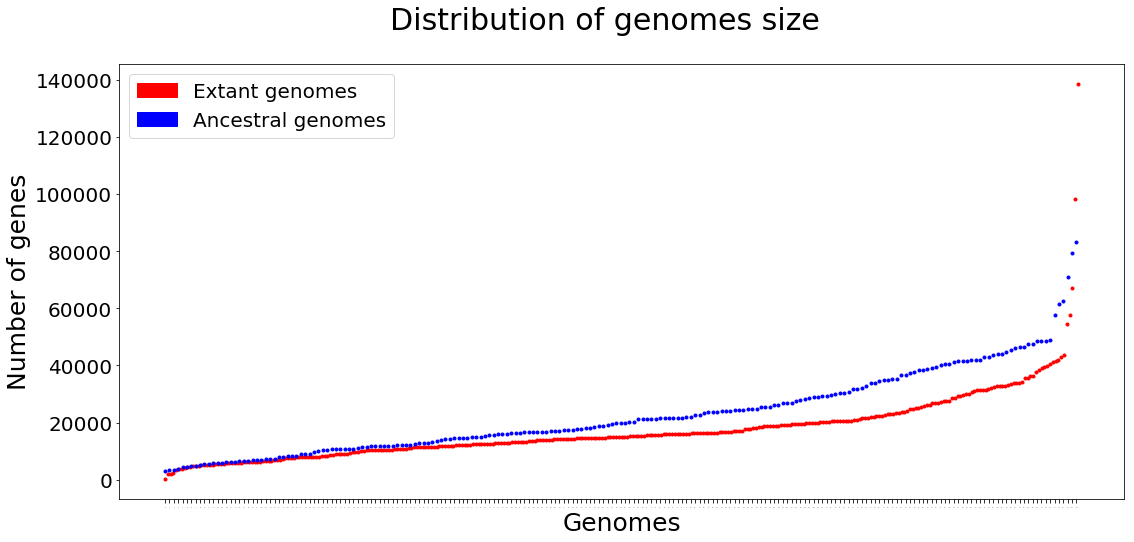

In [8]:
size_leaves=[]
size_nodes=[]
for n in tax.leaves:       
    size_leaves.append(len(n.genome.genes))
    
            
for n in tax.internal_nodes:
    if n.up:
        size_nodes.append(len(n.genome.genes))
    

leaves_patch=mpatches.Patch(color="red", label= "Extant genomes")
nodes_patch=mpatches.Patch(color="blue", label= "Ancestral genomes")
plt.figure(figsize=(18,8))

plt.plot(np.arange(0,len(size_nodes),len(size_nodes)/len(size_leaves)), sorted(size_leaves),'.', color="red")
plt.plot(np.arange(0,len(size_nodes),1), sorted(size_nodes),'.', color="blue")
plt.xlabel("Genomes", fontsize=25)
plt.ylabel("Number of genes", fontsize=25)
plt.suptitle("Distribution of genomes size", fontsize=30)
plt.xticks(range(len(size_nodes)),fontsize=1)
plt.yticks( fontsize=20)
plt.legend(handles=[leaves_patch, nodes_patch], fontsize=20)

* ### B. Distribution of the rate of duplicated genes among genomes
( referenced as supplemental data 2.B )

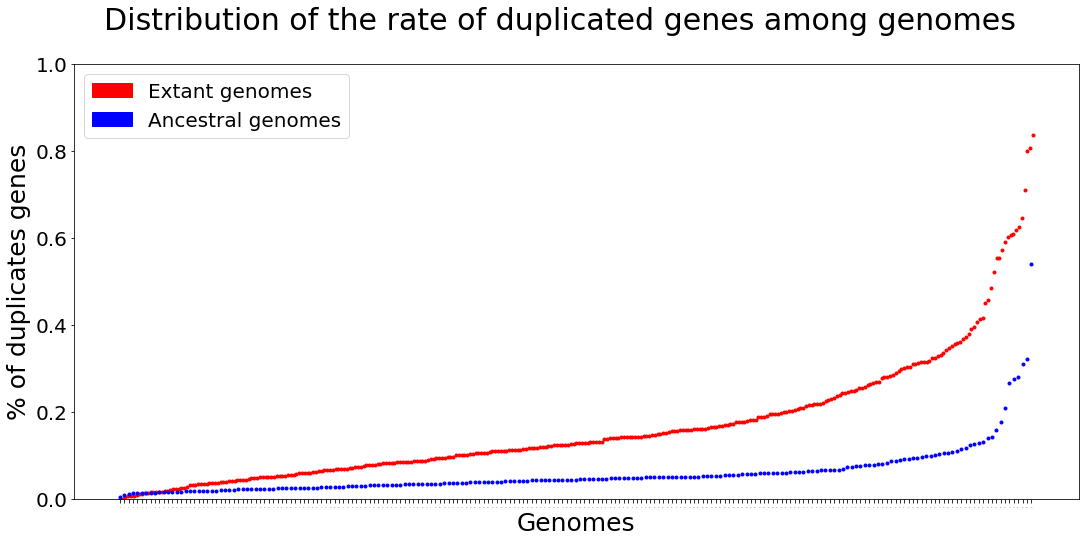

In [10]:
r_leaves=[]
r_nodes=[]
for n in tax.leaves:
    comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
    dup=comp_vert.get_duplicated()
    lost=comp_vert.get_lost()
    gained=comp_vert.get_gained()
    identical=comp_vert.get_identical()
    d=dup_real(dup)
    r=len(d)/float(len(n.genome.genes)-len(gained))    
    r_leaves.append(r)
            
for n in tax.internal_nodes:
    if n.up:
        comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
        dup=comp_vert.get_duplicated()
        lost=comp_vert.get_lost()
        gained=comp_vert.get_gained()
        identical=comp_vert.get_identical()
        d=dup_real(dup) #calcul %gene in child coming from a dup event
        r=len(d)/float(len(n.genome.genes)-len(gained))
        r_nodes.append(r)
    
leaves_patch=mpatches.Patch(color="red", label= "Extant genomes")
nodes_patch=mpatches.Patch(color="blue", label= "Ancestral genomes")    
plt.figure(figsize=(18,8))
plt.plot(np.arange(0,len(r_nodes),len(r_nodes)/len(r_leaves)), sorted(r_leaves),'.', color="red")
plt.plot(np.arange(0,len(r_nodes),1), sorted(r_nodes),'.', color="blue")
plt.xlabel("Genomes", fontsize=25)
plt.ylabel("% of duplicates genes", fontsize=25)
plt.xticks(range(len(r_nodes)),fontsize=1)
plt.yticks([0,0.2,0.4,0.6,0.8,1], fontsize=20)
plt.ylim(0,1)
plt.suptitle("Distribution of the rate of duplicated genes among genomes", fontsize=30)
plt.legend(handles=[leaves_patch, nodes_patch], fontsize=20)

* ## Ratios and vizualisation : Distribution of ratios among genomes
( referenced as figure 2.A )

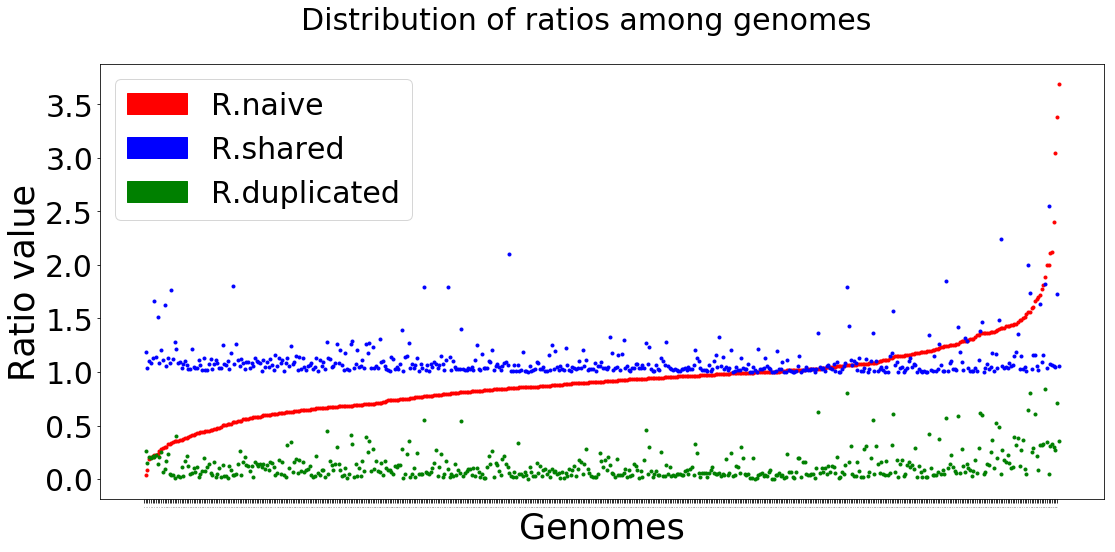

In [14]:
def plot_3ratios(t):
    dict_r={}
    r_list=[]
    for n in t:
        if n.up:  
            comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
            dup=comp_vert.get_duplicated()
            lost=comp_vert.get_lost()
            gained=comp_vert.get_gained()
            identical=comp_vert.get_identical()
            d=dup_real(dup)
            
            # ratios creation
            r_naive=len(n.genome.genes)/float(len(n.up.genome.genes))
            r_shared=float(len(n.genome.genes)-len(gained))/(len(n.up.genome.genes)-len(lost))
            r_duplicated=len(d)/float(len(n.genome.genes)-len(gained))
            
            
            
            dict_r[n.genome.name]=[r_naive,r_shared,r_duplicated]
            r_list.append(r_naive)
    
    
    
    
    r_naive_sort=[]
    r_shared_sort=[]
    r_duplicated_sort=[]
    dict_r_sort=sorted(dict_r.values()) #order dict according to first value (r_naive)
         

    for i in range(len(dict_r_sort)):  # sort r_shared and r_duplicated according to r_naive growing
        s=dict_r_sort[i]
        r_naive_sort.append(s[0])
        r_shared_sort.append(s[1])
        r_duplicated_sort.append(s[2])
        
    
    
    
    x=range(1,len(r_naive_sort)+1)
    r_naive_patch=mpatches.Patch(color="red", label= "R.naive")
    r_shared_patch=mpatches.Patch(color="blue", label= "R.shared")
    r_duplicated_patch=mpatches.Patch(color="green", label= "R.duplicated")
    plt.figure(figsize=(18,8))
    plt.plot(x,r_naive_sort,'.', color="red")
    plt.plot(x,r_shared_sort,'.', color="blue")
    plt.plot(x,r_duplicated_sort,'.', color="green")
    plt.xlabel("Genomes", fontsize=35)
    plt.ylabel("Ratio value", fontsize=35)
    plt.suptitle("Distribution of ratios among genomes", fontsize=30)
    plt.xticks(range(len(r_naive_sort)),fontsize=1)
    plt.yticks( fontsize=30)
    plt.legend(handles=[r_naive_patch, r_shared_patch, r_duplicated_patch], fontsize=30)
    plt.show()

    
plot_3ratios(t)

# 3.2 Extant genomes
### and Venn Diagram
(referenced as figure 2.B)

{'BRANA',
 'COPCI',
 'ERATE',
 'GOSHI',
 'MANES',
 'PARTE',
 'PHYPA',
 'POPTR',
 'SELML',
 'SOYBN',
 'WHEAT'}

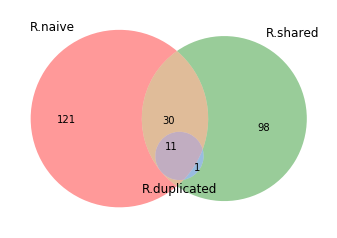

In [10]:
def wgd_venne(t, threshold_r_naive, threshold_r_shared, threshold_r_duplicated):
    Naive_set=set()
    Shared_set=set()
    Duplicated_set=set()
    
    
    #Loop that allows to exclude extant genomes that have diverged early and have only few ancestors.
    not_exclude=[]
    exclude=[]
    for n in tax.leaves:
        ancestors=dup_names_size_list(n.genome.name)[1]
        if len(ancestors)<3:
            exclude.append(n.genome.name)
    
    
        
        
    
    for n in t:
        if n.up:
            if n.genome.name not in exclude:  # use 'exclude' or 'not_exclude' list to choose to exlude genomes or not
                comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
                dup=comp_vert.get_duplicated()
                lost=comp_vert.get_lost()
                gained=comp_vert.get_gained()
                identical=comp_vert.get_identical()
                d=dup_real(dup)
                
                r_naive=len(n.genome.genes)/float(len(n.up.genome.genes))
                r_shared=float(len(n.genome.genes)-len(gained))/(len(n.up.genome.genes)-len(lost))
                r_duplicated=len(d)/float(len(n.genome.genes)-len(gained))
                
            
                if r_naive>threshold_r_naive:
                    Naive_set.add(n.genome.name)
                if r_shared>threshold_r_shared:
                    Shared_set.add(n.genome.name) 
                if r_duplicated>threshold_r_duplicated:
                    Duplicated_set.add(n.genome.name)
                
               
    venn3([Naive_set,Shared_set,Duplicated_set],('R.naive','R.shared','R.duplicated'))
    
    intersection=(Naive_set&Shared_set&Duplicated_set)
    return(intersection)

wgd_venne(t,1,1.1,0.5)




,BRANA,COPCI,ERATE,GOSHI,MANES,PARTE,PHYPA,POPTR,SELML,SOYBN,WHEAT
R.naive,1.381140,1.365250,1.031702,1.891029,1.082143,3.381773,1.137981,1.365100,1.062851,1.559859,1.664814
R.shared,1.171426,1.471756,1.369036,1.821931,1.363273,1.733162,1.566551,1.384487,1.797005,1.734649,1.154521
R.duplicated,0.522457,0.602864,0.624827,0.836638,0.554646,0.710264,0.606275,0.618241,0.799550,0.806686,0.608310


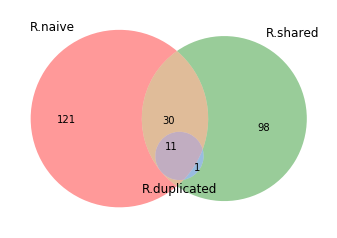

In [12]:
characteristics_results1={}
for name in wgd_venne(t,1,1.1,0.5):
    for n in t:
        if n.genome.name==name:
        
            comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
            dup=comp_vert.get_duplicated()
            lost=comp_vert.get_lost()
            gained=comp_vert.get_gained()
            identical=comp_vert.get_identical()
            d=dup_real(dup)
                
            r_naive=len(n.genome.genes)/float(len(n.up.genome.genes))
            r_shared=float(len(n.genome.genes)-len(gained))/(len(n.up.genome.genes)-len(lost))
            r_duplicated=len(d)/float(len(n.genome.genes)-len(gained))
                
            characteristics_results1[n.genome.name]=[r_naive, r_shared, r_duplicated]
characteristics_results_extant_genomes = pd.DataFrame(characteristics_results1, index=["R.naive", "R.shared","R.duplicated"])
characteristics_results_extant_genomes

# 3.3 Ancestral genomes

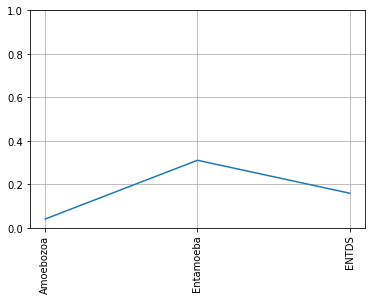

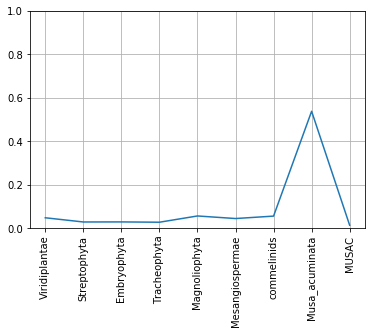

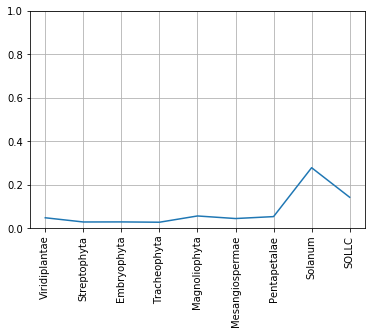

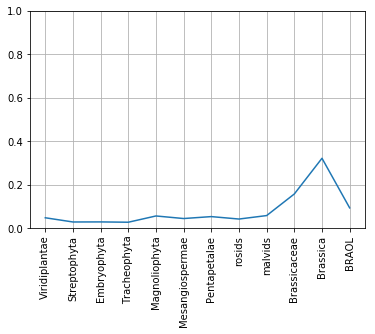

,Brassica,Entamoeba,Musa_acuminata,Solanum
R.naive,1.722717,1.068135,0.808836,0.746797
R.shared,1.632292,1.110064,1.404379,1.389277
R.duplicated,0.322617,0.310017,0.538777,0.279226


In [21]:
names_ancestral_genomes=[]

for n in tax.leaves:
    name=n.genome.name
    liste_dup_name_size=dup_names_size_list(name)
    dup=liste_dup_name_size[0]
    name_list=liste_dup_name_size[1]
    
       
    for i in range(0,len(dup)-1): #  (-1) to not take in account the extant genome;
        if dup[i]==max(dup):
            r=(dup[i])/(dup[i-1])
            r2=(dup[i])/(dup[i+1])
        
        
            if (r>3 or r2>3) and dup[i]>0.279:
                if name_list[i] not in names_ancestral_genomes:
                    names_ancestral_genomes.append(name_list[i])
                    plot_duplication_rate(name)
                    
characteristics_results2={}
for n in tax.internal_nodes:
    if n.up:
        
         if n.genome.name in names_ancestral_genomes:
            
            
            comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
            dup=comp_vert.get_duplicated()
            lost=comp_vert.get_lost()
            gained=comp_vert.get_gained()
            identical=comp_vert.get_identical()
            d=dup_real(dup)
            r_naive=len(n.genome.genes)/float(len(n.up.genome.genes))
            r_shared=float(len(n.genome.genes)-len(gained))/(len(n.up.genome.genes)-len(lost))
            r_duplicated=len(d)/float(len(n.genome.genes)-len(gained))
                
                
            
            characteristics_results2[n.genome.name]=[r_naive,r_shared,r_duplicated]
characteristics_results_ancestral_genomes=pd.DataFrame(characteristics_results2, index=["R.naive","R.shared","R.duplicated"])
characteristics_results_ancestral_genomes

# 3.3 Vertebrates and fish-specific WGD hypothesis
(referenced as figure 3 )

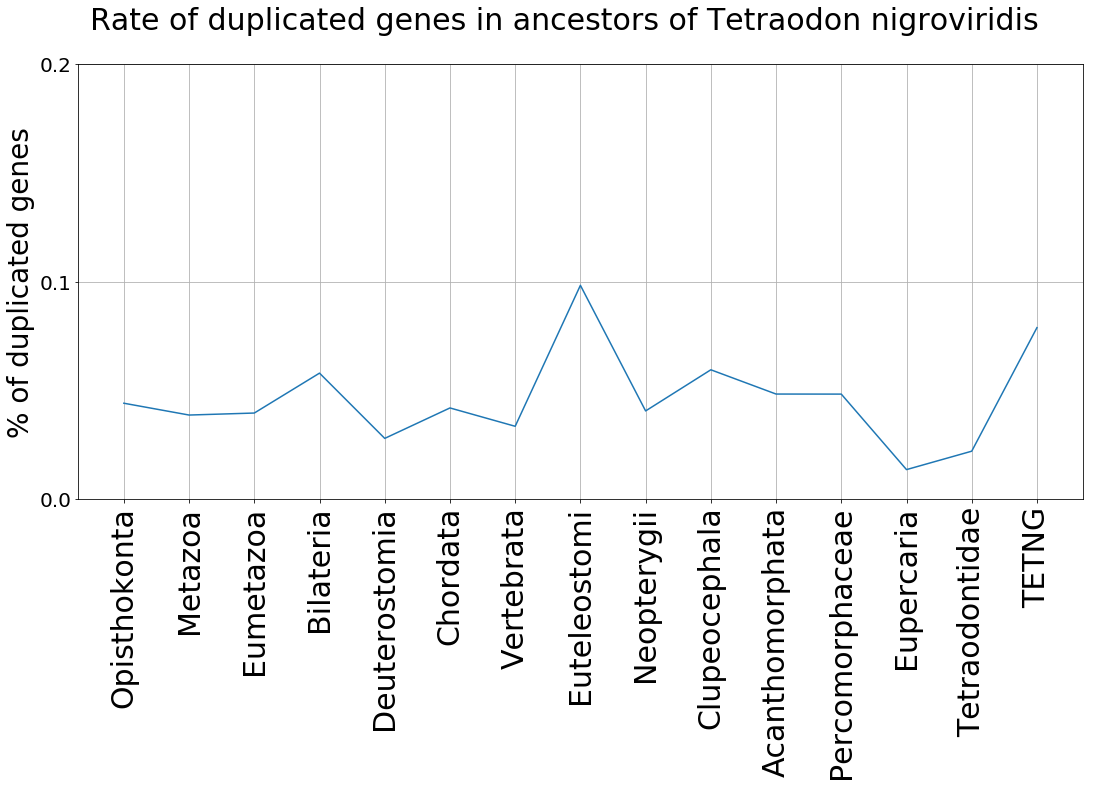

In [77]:
def plot_2R_hypothesis(name):
    
    import matplotlib.pyplot as plt
    liste=dup_names_size_list(name)
    y=liste[0]
    x=range(0,len(liste[1]))
    x2=liste[1]
    
    plt.figure(figsize=(18,8))
    plt.xticks(range(len(x2)),x2,rotation=90, fontsize=30)
    plt.yticks([0,0.1,0.2, 0.3], fontsize=20)
    plt.ylabel("% of duplicated genes", fontsize=28)
    plt.suptitle("Rate of duplicated genes in ancestors of Tetraodon nigroviridis", fontsize=30)
    
    plt.plot(x,y)
    plt.ylim(0,0.2)
    plt.grid(True)
    plt.show()
plot_2R_hypothesis("TETNG")

# 4. Supplemental tables

 * # 4.1 Characteristics of genomes referenced as known wgd

In [23]:


#G. max, P. trichocarpa, G. raimondii, Triticum aestivum, Z. mays, P. patens, E. tef, P. tetraurelia, R. oryzae, Solanum, Musa acuminata, Poaceae, Brassicaceae, Brassica.

def matrix_known_wgd(t):
   
    liste=["SOYBN","POPTR","GOSHI", "WHEAT","MAIZE","PHYPA","ERATE","PARTE","RHIOR","Solanum","Musa_acuminata","Poaceae","Brassicaceae","Brassica"]
    
    r_liste=[]
    names=[]
    
    dict_matrix={}
    for n in t:
        if n.up:
        
            if n.genome.name in liste:
                r=len(n.genome.genes)/float(len(n.up.genome.genes))
            
                comp_vert=ham_analysis.compare_genomes_vertically(n.genome,n.up.genome)
                dup=comp_vert.get_duplicated()
                lost=comp_vert.get_lost()
                gained=comp_vert.get_gained()
                identical=comp_vert.get_identical()
            
                d=dup_real(dup)
            
            
                
                r1=round(len(d)/float(len(n.genome.genes)-len(gained)),2)
                r12=round(len(identical)/float(len(n.genome.genes)),2)
                r13=round(len(lost)/float(len(n.up. genome.genes)),2)
                r14=round(len(gained)/float(len(n.genome.genes)),2)
            
                if r1>0:
                    r_liste.append(r1)
                    r_liste.append(r12)
                    r_liste.append(r13)
                    r_liste.append(r14)
                    names.append(n.genome.name)
                    dict_matrix[n.genome.name]=[r1,r12,r13,r14]
    df = pd.DataFrame(dict_matrix, index=["R.duplicated", "% of genes identical", "% of ancestral genes lost", "% of genes gained"])
    return(df)
matrix_known_wgd(t)

,Brassica,Brassicaceae,ERATE,GOSHI,MAIZE,Musa_acuminata,PARTE,PHYPA,POPTR,Poaceae,RHIOR,SOYBN,Solanum,WHEAT
R.duplicated,0.32,0.16,0.62,0.84,0.37,0.54,0.71,0.61,0.62,0.11,0.40,0.81,0.28,0.61
% of genes identical,0.49,0.63,0.29,0.14,0.41,0.34,0.11,0.17,0.31,0.70,0.34,0.16,0.58,0.25
% of ancestral genes lost,0.07,0.31,0.42,0.09,0.25,0.57,0.26,0.68,0.21,0.14,0.29,0.25,0.51,0.06
% of genes gained,0.12,0.07,0.23,0.13,0.36,0.26,0.62,0.56,0.19,0.16,0.43,0.16,0.09,0.35
